# Linear Autoencoder

We have an anonymized dataset with 30 features, using autoencoder we want to perform Principal Component Analysis(PCA) to reduce the dimension of the data to 2 features. 

## Import Libraries

In [1]:
# import numpy and pandas 
import numpy as np
import pandas as pd

In [2]:
# import matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read the data source 
data = pd.read_csv('anonymized_data.csv')
data.shape

(500, 31)

In [4]:
# print the top 5 records
data.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


In [5]:
# check for the NULL value in the data
data.isnull().sum().any()

False

In [6]:
# Import sklearn for normalization
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.drop('Label',axis=1))

## Define Network

To define network we are going to use tensorflow fully connected API. A linerar autoencoder has 3 layers (encoding, hidden and decoding), the encoding and decoding layers have ‘linear activations’ and the hidden layer has two neurons. Essentially this structure approximates PCA by reducing the data from four features to two features in the hidden layer.

In [8]:
# import tensorflow and layer API
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [9]:
num_input  = 30  # 30 dimensional input
num_hidden = 2  # 2 dimensional representation 
num_output = 30  # 3 dimensional output (same as input)

In [10]:
# placeholder for x
input_layer = tf.placeholder(tf.float32, shape=[None, num_input])

In [11]:
# fully connected hidden layer with no activation function
hidden_layer = fully_connected(input_layer, num_hidden, activation_fn=None)

In [12]:
# fully connected output layer with no activation function
output_layer = fully_connected(hidden_layer, num_output, activation_fn=None)

## Loss Function

Since, our target is to generate output sample as similar as input raw data, we are going to use mean squared error.

In [13]:
# defining loss function (Mean Squared Error)
loss = tf.reduce_mean(tf.square(output_layer - input_layer))

## Optimizer

In [14]:

# defining learning rate for the optimizer# defini 
learning_rate = 0.01

# create optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

## Running the Session

In [15]:
num_steps = 1000

# initialize session
with tf.Session() as sess:
    
    # initialize variables
    sess.run(tf.global_variables_initializer())
    
    # train the model
    for i in range(num_steps):
        sess.run(optimizer, feed_dict={input_layer: scaled_data})
   
    # eval hidden layer (2 dimensional output)
    output_ = hidden_layer.eval(feed_dict={input_layer: scaled_data})

## Result
After passing the training data through the hidden layer we get two new vectors and by plotting them against each other we clearly blob and cluster formation similar to Principal component analysis (PCA).

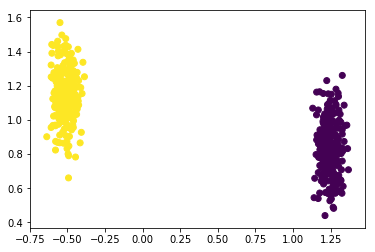

In [16]:
# plot the PCA result
plt.scatter(output_[:,0],output_[:,1],c=data['Label']);